In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from shutil import copy
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
os.chdir('/home/austin/Downloads/Fire-vs-NoFire/')
if os.path.isdir('Training_sample/Fire') is False:
    os.makedirs('Training_sample/Fire')
    os.makedirs('Training_sample/No_Fire')
for each in ['Fire', 'No_Fire']:    
    files = os.listdir('Training/'+each)

    for i in random.sample(glob.glob('Training/'+each+'/*'), 1000):
        print(i)
        copy(i, 'Training_sample/'+each+'/') 

Training/Fire/resized_frame15711.jpg
Training/Fire/resized_frame20628.jpg
Training/Fire/resized_frame22313.jpg
Training/Fire/resized_frame22136.jpg
Training/Fire/resized_frame26686.jpg
Training/Fire/resized_frame21386.jpg
Training/Fire/resized_frame17670.jpg
Training/Fire/resized_frame26324.jpg
Training/Fire/resized_frame7738.jpg
Training/Fire/resized_frame14111.jpg
Training/Fire/resized_frame23498.jpg
Training/Fire/resized_frame712.jpg
Training/Fire/resized_frame14210.jpg
Training/Fire/resized_frame8147.jpg
Training/Fire/resized_frame1788.jpg
Training/Fire/resized_frame22059.jpg
Training/Fire/resized_frame3197.jpg
Training/Fire/resized_frame10734.jpg
Training/Fire/resized_frame1032.jpg
Training/Fire/resized_frame21753.jpg
Training/Fire/resized_frame19304.jpg
Training/Fire/resized_frame6960.jpg
Training/Fire/resized_frame19535.jpg
Training/Fire/resized_frame7395.jpg
Training/Fire/resized_frame8726.jpg
Training/Fire/resized_frame6067.jpg
Training/Fire/resized_frame7348.jpg
Training/Fire

Training/Fire/resized_frame12807.jpg
Training/Fire/resized_frame12995.jpg
Training/Fire/resized_frame177.jpg
Training/Fire/resized_frame27219.jpg
Training/Fire/resized_frame1769.jpg
Training/Fire/resized_frame7171.jpg
Training/Fire/resized_frame16465.jpg
Training/Fire/resized_frame22001.jpg
Training/Fire/resized_frame12649.jpg
Training/Fire/resized_frame21521.jpg
Training/Fire/resized_frame26130.jpg
Training/Fire/resized_frame25798.jpg
Training/Fire/resized_frame11480.jpg
Training/Fire/resized_frame27454.jpg
Training/Fire/resized_frame25549.jpg
Training/Fire/resized_frame13911.jpg
Training/Fire/resized_frame7259.jpg
Training/Fire/resized_frame16009.jpg
Training/Fire/resized_frame10120.jpg
Training/Fire/resized_frame6335.jpg
Training/Fire/resized_frame5247.jpg
Training/Fire/resized_frame10589.jpg
Training/Fire/resized_frame23105.jpg
Training/Fire/resized_frame23636.jpg
Training/Fire/resized_frame16138.jpg
Training/Fire/resized_frame24037.jpg
Training/Fire/resized_frame23380.jpg
Training

Training/No_Fire/lake_resized_lake_frame10213.jpg
Training/No_Fire/lake_resized_lake_frame4463.jpg
Training/No_Fire/lake_resized_lake_frame3437.jpg
Training/No_Fire/lake_resized_lake_frame7606.jpg
Training/No_Fire/lake_resized_lake_frame6222.jpg
Training/No_Fire/resized_frame17284.jpg
Training/No_Fire/lake_resized_lake_frame7073.jpg
Training/No_Fire/lake_resized_lake_frame3786.jpg
Training/No_Fire/resized_frame3411.jpg
Training/No_Fire/lake_resized_lake_frame6009.jpg
Training/No_Fire/lake_resized_lake_frame4131.jpg
Training/No_Fire/resized_frame3851.jpg
Training/No_Fire/lake_resized_lake_frame11652.jpg
Training/No_Fire/lake_resized_lake_frame8607.jpg
Training/No_Fire/lake_resized_lake_frame128.jpg
Training/No_Fire/lake_resized_lake_frame9282.jpg
Training/No_Fire/lake_resized_lake_frame580.jpg
Training/No_Fire/resized_frame16863.jpg
Training/No_Fire/lake_resized_lake_frame6578.jpg
Training/No_Fire/lake_resized_lake_frame8532.jpg
Training/No_Fire/lake_resized_lake_frame1003.jpg
Training/

Training/No_Fire/lake_resized_lake_frame11522.jpg
Training/No_Fire/lake_resized_lake_frame4810.jpg
Training/No_Fire/lake_resized_lake_frame1014.jpg
Training/No_Fire/lake_resized_lake_frame10880.jpg
Training/No_Fire/resized_frame16659.jpg
Training/No_Fire/resized_frame18815.jpg
Training/No_Fire/lake_resized_lake_frame2507.jpg
Training/No_Fire/lake_resized_lake_frame9838.jpg
Training/No_Fire/lake_resized_lake_frame3179.jpg
Training/No_Fire/lake_resized_lake_frame5670.jpg
Training/No_Fire/lake_resized_lake_frame607.jpg
Training/No_Fire/lake_resized_lake_frame9028.jpg
Training/No_Fire/lake_resized_lake_frame5856.jpg
Training/No_Fire/resized_frame16695.jpg
Training/No_Fire/lake_resized_lake_frame3044.jpg
Training/No_Fire/lake_resized_lake_frame2405.jpg
Training/No_Fire/lake_resized_lake_frame3255.jpg
Training/No_Fire/resized_frame11695.jpg
Training/No_Fire/lake_resized_lake_frame10818.jpg
Training/No_Fire/resized_frame3499.jpg
Training/No_Fire/lake_resized_lake_frame11051.jpg
Training/No_Fi

Training/No_Fire/lake_resized_lake_frame2546.jpg
Training/No_Fire/resized_frame17292.jpg
Training/No_Fire/lake_resized_lake_frame2641.jpg
Training/No_Fire/lake_resized_lake_frame10624.jpg
Training/No_Fire/resized_frame17160.jpg
Training/No_Fire/lake_resized_lake_frame3751.jpg
Training/No_Fire/lake_resized_lake_frame9297.jpg
Training/No_Fire/lake_resized_lake_frame5600.jpg
Training/No_Fire/lake_resized_lake_frame8362.jpg
Training/No_Fire/lake_resized_lake_frame622.jpg
Training/No_Fire/lake_resized_lake_frame5884.jpg
Training/No_Fire/lake_resized_lake_frame7488.jpg
Training/No_Fire/lake_resized_lake_frame11237.jpg
Training/No_Fire/lake_resized_lake_frame5905.jpg
Training/No_Fire/resized_frame6756.jpg
Training/No_Fire/lake_resized_lake_frame4864.jpg
Training/No_Fire/resized_frame17036.jpg
Training/No_Fire/lake_resized_lake_frame6051.jpg
Training/No_Fire/lake_resized_lake_frame5472.jpg
Training/No_Fire/lake_resized_lake_frame9857.jpg
Training/No_Fire/lake_resized_lake_frame6678.jpg
Trainin

In [3]:

train_path = '/home/austin/Downloads/Fire-vs-NoFire/Training_sample/'
test_path = '/home/austin/Downloads/Fire-vs-NoFire/Test'

In [4]:
image_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.1) 

train_batches = image_generator.flow_from_directory(directory=train_path, target_size=(254,254), classes=['No_Fire', 'Fire'], batch_size=10, subset="training", class_mode='categorical')
valid_batches = image_generator.flow_from_directory(directory=train_path, target_size=(254,254), classes=['No_Fire', 'Fire'], batch_size=10, subset="validation", class_mode='categorical')
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(254,254), classes=['No_Fire', 'Fire'], batch_size=10, shuffle=False)

Found 3506 images belonging to 2 classes.
Found 388 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [5]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

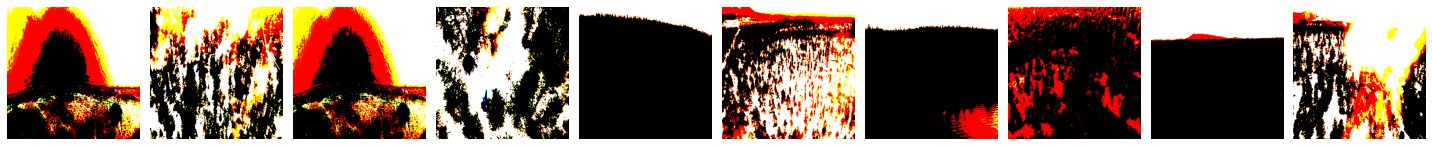

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(254,254,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 254016)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 508034    
Total params: 527,426
Trainable params: 527,426
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=2
)

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [61]:
test_batches.class_indices

{'No_Fire': 0, 'Fire': 1}

Confusion matrix, without normalization
[[ 912 2568]
 [1885 3252]]


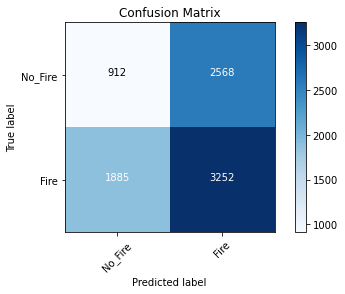

In [63]:
cm_plot_labels = ['No_Fire','Fire']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [79]:
accuracy_score(test_batches.classes, np.argmax(predictions, axis=-1))

0.48323082279215507

In [14]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [16]:
model_vgg = Sequential()
for layer in vgg16_model.layers[:-1]:
    model_vgg.add(layer)

In [17]:
model_vgg.add(Dense(units=2, activation='sigmoid'))

In [18]:
model_vgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      